In [1]:
import mypytorch
%matplotlib inline
import sys
sys.path.append("..")
import d2lzh_pytorch as d2l
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d # 三维画图
import numpy as np
import mypytorch as mp

Text(0, 0.5, 'f(x)')

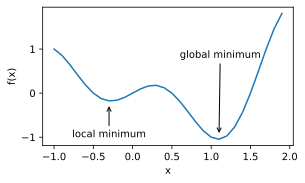

In [2]:
def f(x):
    return x * np.cos(np.pi * x)

d2l.set_figsize((4.5, 2.5))
x = np.arange(-1.0, 2.0, 0.1)
fig,  = d2l.plt.plot(x, f(x))
fig.axes.annotate('local minimum', xy=(-0.3, -0.25), xytext=(-0.77, -1.0),
                  arrowprops=dict(arrowstyle='->'))
fig.axes.annotate('global minimum', xy=(1.1, -0.95), xytext=(0.6, 0.8),
                  arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)')

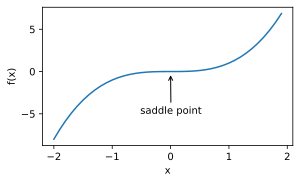

In [3]:
x = np.arange(-2.0, 2.0, 0.1)
fig, = d2l.plt.plot(x, x**3)
fig.axes.annotate('saddle point', xy=(0, -0.2), xytext=(-0.52, -5.0),
                  arrowprops=dict(arrowstyle='->'))
d2l.plt.xlabel('x')
d2l.plt.ylabel('f(x)');

In [4]:
x, y = np.mgrid[-1: 1: 2j, -1: 1: 2j]  # [start: end: step(j)] j:表示分割个数
x, y

(array([[-1., -1.],
        [ 1.,  1.]]),
 array([[-1.,  1.],
        [-1.,  1.]]))

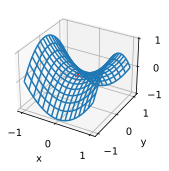

In [5]:
x, y = np.mgrid[-1: 1: 31j, -1: 1: 31j]
z = x**2 - y**2
ax = d2l.plt.figure().add_subplot(111, projection='3d')
ax.plot_wireframe(x, y, z, **{'rstride': 2, 'cstride': 2})
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y');

In [6]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * 2 * x
        results.append(x)
    print('epoch 10: x:', x)
    return results

gd(0.2)

epoch 10: x: 0.06046617599999997


[10,
 6.0,
 3.5999999999999996,
 2.1599999999999997,
 1.2959999999999998,
 0.7775999999999998,
 0.46655999999999986,
 0.2799359999999999,
 0.16796159999999993,
 0.10077695999999996,
 0.06046617599999997]

epoch 10: x: 1.0737418240000003


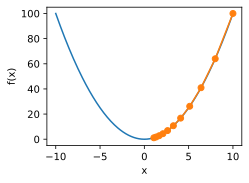

epoch 10: x: 3.4867844009999995


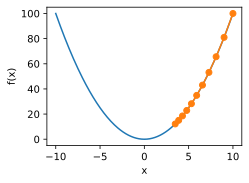

epoch 10: x: 61.917364224000096


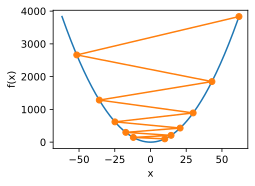

In [7]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    d2l.set_figsize()
    plt.plot(f_line, [x * x for x in f_line])
    plt.plot(res, [x * x for x in res], '-o')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.show()

show_trace(gd(0.1))
show_trace(gd(0.05))
show_trace(gd(1.1))

In [8]:
results = gd(0.1)
results

epoch 10: x: 1.0737418240000003


[10,
 8.0,
 6.4,
 5.12,
 4.096,
 3.2768,
 2.62144,
 2.0971520000000003,
 1.6777216000000004,
 1.3421772800000003,
 1.0737418240000003]

In [9]:
def train_2d(trainer):
    x1, x2, s1, s2 = -5, -2, 0, 0  # s1和s2是自变量状态，本章后续几节会使用
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results


def show_trace_2d(f, results):
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))  # 生成2维网格
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')
    d2l.plt.show()

In [10]:
def f_2d(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2

eta = 0.1
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

epoch 20, x1 -0.057646, x2 -0.000073


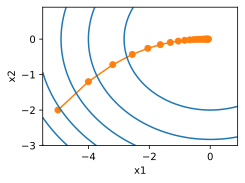

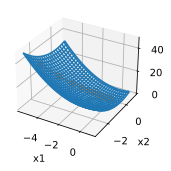

In [11]:
results = train_2d(gd_2d)
show_trace_2d(f_2d, results)
ax = d2l.plt.figure().add_subplot(111, projection='3d')
x1 = np.array(list(zip(*results))[0])
x2 = np.array(list(zip(*results))[1])
z = f_2d(x1, x2)
ax.plot3D(x1, x2, z, '-o', color='#ff7f0e')
x1, x2 = np.mgrid[-5.5: 1.0: 0.1, -3.0: 1.0: 0.1]
z = f_2d(x1, x2)
ax.plot_wireframe(x1, x2, z, **{'rstride': 2, 'cstride': 2})
d2l.plt.xlabel('x1')
d2l.plt.ylabel('x2');

In [12]:
x = [1, 2, 3]
print(list(zip(x)))
x = [(1, 2), (2, 3), (3, 4)]
print(list(zip(x)))
print('*x:',*x)
print('zip(*x):', list(zip(*x)))
print('*zip(*x):', *zip(*x))

[(1,), (2,), (3,)]
[((1, 2),), ((2, 3),), ((3, 4),)]
*x: (1, 2) (2, 3) (3, 4)
zip(*x): [(1, 2, 3), (2, 3, 4)]
*zip(*x): (1, 2, 3) (2, 3, 4)


epoch 20, x1 0.124806, x2 0.178770


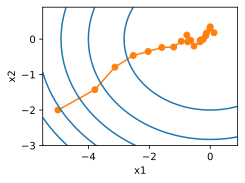

In [13]:
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)

show_trace_2d(f_2d, train_2d(sgd_2d))

## 动量法

epoch 20, x1 -0.943467, x2 -0.000073


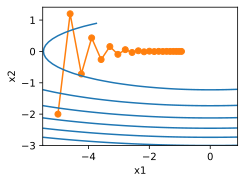

In [14]:
eta = 0.4 # 学习率

def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2

def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, x2 - eta * 4 * x2, 0, 0)

show_trace_2d(f_2d, train_2d(gd_2d))

epoch 20, x1 -3.338040, x2 -0.000073


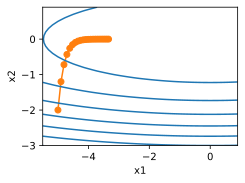

In [15]:
eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d))

epoch 20, x1 -0.387814, x2 -1673.365109


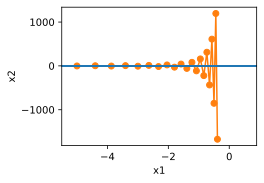

In [16]:
eta = 0.6
show_trace_2d(f_2d, train_2d(gd_2d))

epoch 20, x1 -0.062843, x2 0.001202


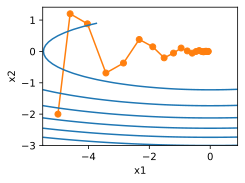

In [17]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

eta, gamma = 0.4, 0.5
show_trace_2d(f_2d, train_2d(momentum_2d))

epoch 20, x1 0.007188, x2 0.002553


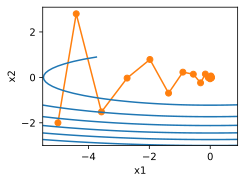

In [19]:
eta, gamma = 0.6, 0.5
show_trace_2d(f_2d, train_2d(momentum_2d))

epoch 20, x1 -0.276228, x2 -119.613947


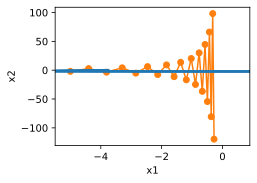

In [20]:
eta, gamma = 0.6, 0.1
show_trace_2d(f_2d, train_2d(momentum_2d))

epoch 20, x1 -1.191637, x2 -1.118465


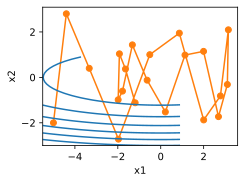

In [21]:
eta, gamma = 0.6, 0.9
show_trace_2d(f_2d, train_2d(momentum_2d))

# 计算机视觉

In [1]:
%matplotlib inline
import time
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torchvision
from PIL import Image
import mypytorch

import sys
sys.path.append("..")
import d2lzh_pytorch as d2l
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


Files already downloaded and verified


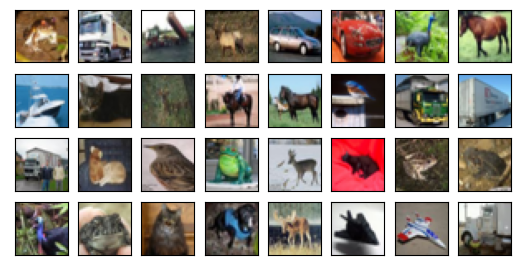

In [2]:
all_imges = torchvision.datasets.CIFAR10(train=True, root="~/Datasets/CIFAR", download=True)
# all_imges的每一个元素都是(image, label)
mypytorch.show_images([all_imges[i][0] for i in range(32)], 4, 8, scale=0.8);

# 机器翻译

In [5]:
import zipfile

In [17]:
def load_fra_eng_data():
    with zipfile.ZipFile('data/fra-eng.zip') as zin:
        with zin.open('fra.txt') as f:
            lines = f.read().decode('utf-8')
            lines = lines.split('\n')
            for line in lines:
                print(line)
                a = re.match(r'.*(CC-BY 2.0 .France. Attribution: tatoeba.org.*)', line).groups()[0]
                line.replace(a, '')
            print(lines[:20])
load_fra_eng_data()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



According to legend, those woods used to be haunted, so people would avoid entering.	Selon la légende, ces bois étaient hantés, aussi les gens évitaient d'y pénétrer.	CC-BY 2.0 (France) Attribution: tatoeba.org #1212404 (CK) & #1212407 (sacredceltic)
After she lost her job, she couldn't afford to feed her dogs, so she gave them away.	Après qu'elle eut perdu son travail, elle n'était plus en mesure de nourrir ses chiens, alors elle les donna.	CC-BY 2.0 (France) Attribution: tatoeba.org #898569 (CK) & #1406765 (sacredceltic)
All the houses in this neighborhood look so much alike that I can't tell them apart.	Toutes les maisons de ce voisinage se ressemblent tellement que je ne peux les différencier.	CC-BY 2.0 (France) Attribution: tatoeba.org #59623 (CK) & #11330 (dominiko)
Before you go hiking in the woods, find out what you should do when you meet a bear.	Avant de partir en randonnée dans les bois, apprenez ce que vous devriez faire lorsque vous rencontrez un ours.	CC-BY 2.0 (France) A

AttributeError: 'NoneType' object has no attribute 'groups'

In [34]:
import re
text = 'Go.	Va !	CC-BY 2.0 (France) Attribution: tatoeba.org #2877272 (CM) & #1158250 (Wittydev)'
# a = re.sub(r'CC-BY 2.0 (France) Attribution: tatoeba.org.*', )
a = re.match(r'.*(CC-BY 2.0 .France. Attribution: tatoeba.org.*)', text)
a.groups()

AttributeError: 'NoneType' object has no attribute 'groups'